In [2]:
! pip install -U langgraph

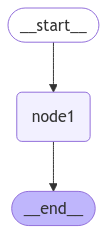

In [3]:
from langgraph.graph import START,END,StateGraph
from typing_extensions import TypedDict
from typing import Annotated
from operator import add 
from IPython.display import Image, display
from langgraph.graph.state import CompiledStateGraph

class State(TypedDict):
    foo:int
    
def node_1(state:State):
    print("Node 1")
    return {'foo': state['foo']+1}

workflow:StateGraph = StateGraph(State)

workflow.add_node('node1',node_1)

workflow.set_entry_point('node1')
workflow.add_edge('node1',END)
graph:CompiledStateGraph = workflow.compile()

display(Image(graph.get_graph().draw_mermaid_png()))



In [4]:
graph.invoke({'foo':1})

Node 1


{'foo': 2}

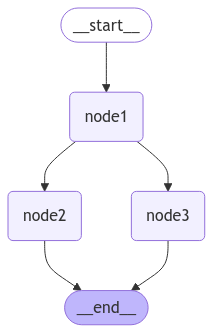

In [5]:
class State(TypedDict):
    foo:int

def node_1(state:State):
    return {'foo':state['foo'] +1}

def node_2(state:State):
    return {'foo':state['foo'] +1}

def node_3(state:State):
    return {'foo':state['foo'] +1}

workflow : StateGraph = StateGraph(State)
workflow.add_node('node1',node_1)
workflow.add_node('node2',node_2)
workflow.add_node('node3',node_3)

workflow.add_edge(START,'node1')
workflow.add_edge('node1','node2')
workflow.add_edge('node1','node3')
workflow.add_edge('node2',END)
workflow.add_edge('node3',END)

graph: CompiledStateGraph = workflow.compile()

display(Image(graph.get_graph().draw_mermaid_png()))






In [6]:
# This error occur because there is no mechanism in the graph to handle two values parallely
from langgraph.errors import InvalidUpdateError
try:
    graph.invoke({"foo": 1})
except InvalidUpdateError as e:
    print(f"InvalidUpdateError occurred: {e}")

InvalidUpdateError occurred: At key 'foo': Can receive only one value per step. Use an Annotated key to handle multiple values.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_CONCURRENT_GRAPH_UPDATE


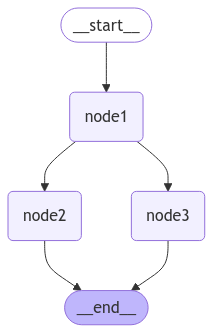

In [7]:
class State(TypedDict):
    foo:Annotated[list[int],add]
    
    
def node_1(state:State):
    return {'foo':[state['foo'][-1] +1]}

def node_2(state:State):
    return {'foo':[state['foo'][-1] +1]}

def node_3(state:State):
    return {'foo':[state['foo'][-1] +1]}

workflow : StateGraph = StateGraph(State)
workflow.add_node('node1',node_1)
workflow.add_node('node2',node_2)
workflow.add_node('node3',node_3)

workflow.add_edge(START,'node1')
workflow.add_edge('node1','node2')
workflow.add_edge('node1','node3')
workflow.add_edge('node2',END)
workflow.add_edge('node3',END)

graph: CompiledStateGraph = workflow.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
graph.invoke({'foo': [1]})

{'foo': [1, 2, 3, 3]}

In [9]:
try:
    graph.invoke({'foo':None})
except TypeError as e:
    print(f"TypeError occured :{e}")

TypeError occured :can only concatenate list (not "NoneType") to list


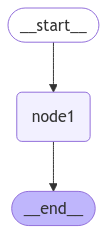

In [10]:
def reduce_list(left:list| None,right:list | None):
    if not left:
        left=[]
    if not right:
        right=[]
    return left+right

class CustomReducerClass(TypedDict):
    foo:Annotated[list[int],reduce_list]
    
def node_1(state:CustomReducerClass):
    return{'foo':[2]}

workflow1:StateGraph = StateGraph(CustomReducerClass)

workflow1.add_node('node1',node_1)

workflow1.add_edge(START,'node1')
workflow1.add_edge('node1',END)

builder:CompiledStateGraph = workflow1.compile()

display(Image(builder.get_graph().draw_mermaid_png()))

In [11]:
builder.invoke({'foo':[9]})

{'foo': [9, 2]}

In [12]:
builder.invoke({'foo':None})

{'foo': [2]}

In [13]:
a =[3]
b=[8]
c= a+b
print(c)

[3, 8]
